# **Stochastic Gradient Descent Regression for the CDK2 K<sub>i</sub> Dataset**

This Jupyter Notebook builds a regression model using the Stochastic Gradient Descent method ([Géron, 2023](https://www.isbns.net/isbn/9781098125974/)) for data from the CDK2 K<sub>i</sub> dataset ([de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)). This code employs the [SGDRegressor](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html) class from the [Scikit-Learn](https://scikit-learn.org/stable/) library ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)) to generate a regression model. We evaluate the model's predictive performance using metrics recommended by [Walsh et al., 2021](https://doi.org/10.1038/s41592-021-01205-4) and de [Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449).
<br></br>
<img src="https://drive.usercontent.google.com/download?id=1tlr-fYknxHQri6XSQmy7fHW_jrQPrGpl&export=view&authuser=0" width=600 alt="PDB: 2A4L">
<br><i>Structure of a protein-ligand complex ([de Azevedo et al., 1997](https://doi.org/10.1111/j.1432-1033.1997.0518a.x)) with an inhibitor bound to the macromolecule (PDB access code: [2A4L](https://www.rcsb.org/structure/2A4L)).</i></br>
<br></br>
**References**
<br></br>
De Azevedo WF, Leclerc S, Meijer L, Havlicek L, Strnad M, Kim SH. Inhibition of cyclin-dependent kinases by purine analogues: crystal structure of human cdk2 complexed with roscovitine. Eur J Biochem. 1997; 243(1-2): 518-26.
PMID: 9030780.
[DOI: 10.1111/j.1432-1033.1997.0518a.x](https://doi.org/10.1111/j.1432-1033.1997.0518a.x)
<br></br>
De Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,
Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning models to explore the scoring function space. J Comput Chem. 2024; 45(27): 2333-2346.
PMID: 38900052. [DOI: 10.1002/jcc.27449](https://doi.org/10.1002/jcc.27449) [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)
<br></br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br></br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830. [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br></br>
Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME: recommendations for supervised machine learning validation in biology. Nat Methods. 2021; 18(10): 1122-1127. [DOI: 10.1038/s41592-021-01205-4](https://doi.org/10.1038/s41592-021-01205-4) [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
<br></br>

It follows the complete Python code.




Generating (C7,7 = 1) regression models ...done!

Number of generated regression models:  1

Metrics saved to file: metrics_EDOME_C_7_7.csv

Minimum RMSE: 0.9625 for features: ['Gauss 2', 'Hydrogen', 'Torsional', 'Average Q', 'N', 'O', 'S']

Saving scatter plot to file: scatter_plot_test_set_C_7_7.pdf...

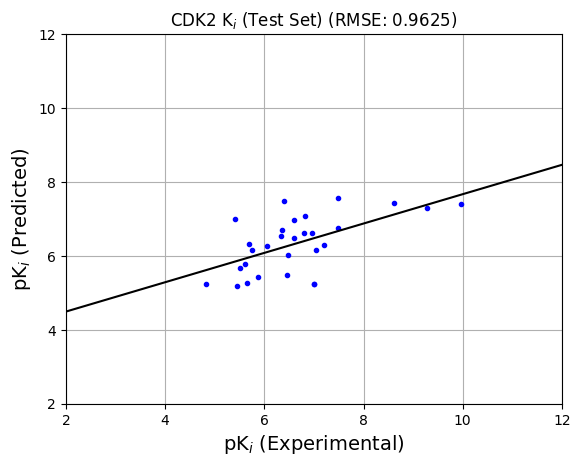

done!

Parameter vector 
Intercept:  6.3374
Coefficients:  [-0.34506683  0.09216481 -0.29390621  0.22055541  0.27449036  0.51839935
  0.26403894]


In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor

################################################################################
# Define cross_validation() function                                           #
################################################################################
def cross_validation(model,X,y,n_splits,random_state,verbose):
    """Function to set up a k-fold class. Kfold class to build an n-fold
    cross-validation loop and test the generalization ability of regression.
    We generally obtain a more conservative estimate (that is, we have poorer
    predictive metrics) with cross-validation. The cross-validation estimate is
    a better model for generalizing and predicting unseen data.

    Parameters:

    model (scikit-learn model):     Regression model generated with Scikit-Learn
                                    library ([Pedregosa et al., 2011]
                                    (https://doi.org/10.48550/arXiv.1201.0490))
    X (dataframe):                  X data
    y (dataframe):                  y data
    n_splits (integer):             Number of splits
    random_state (integer):         Random seed
    verbose(boolean):               Generate additional information about
                                    cross-validation() funcitons
    <br></br>
    **References**
    <br> </br>
    Coelho LP, Richert W, Brucher M. Building Machine Learning Systems with
    Python: Explore Machine Learning and Deep Learning Techniques for Building
    Intelligent Systems Using Scikit-Learn and TensorFlow, 3rd Edition,
    3rd ed.; Packt Publishing: Birmingham, England, 2018.
    [ISBN: 978-1-788-62322-3](https://www.isbns.net/isbn/9781788623223/)
    <br></br>
    Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O,
    Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A,
    Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine
    Learning in Python. J Mach Learn Res., 2011; 12:2825–2830.
    [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
    <br></br>
    """

    # Import section
    from sklearn.model_selection import KFold, cross_val_score
    from warnings import simplefilter
    import numpy as np

    # Set up k-fold class
    kf = KFold(n_splits=n_splits,shuffle=True, random_state=random_state)

    # Ignore all future warnings
    simplefilter(action='ignore', category=DeprecationWarning)

    # Looping through kf.split()
    for train,test in kf.split(X):

        # Generate regression model
        model.fit(X[train],y[train])

    # Show Walsh metrics if requested
    if verbose:
        # Show average coefficient of determination using n-fold crossvalidation
        scores = cross_val_score(model,X,y,cv=kf)
        msg_out = "Average coefficient of determination using n-fold "
        msg_out += "cross-validation"
        print("\n"+msg_out+":",np.mean(scores))

    # Return model
    return model

################################################################################
# Define Walsh_and_de_Azevedo_regression_metrics() function                    #
################################################################################
def Walsh_and_de_Azevedo_regression_metrics(y,y_pred):
    """Function to calculate regression metrics as recommended by
    [Walsh et 2021](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    and
    [de Azevedo Jr et al., 2024](https://pubmed.ncbi.nlm.nih.gov/38900052/))

    Parameters:

    y (dataframe):                  y
    y_test (dataframe):             y test set

    where n is the number of instances.

    <br></br>
    **References**
    <br> </br>
    De Azevedo WF, Leclerc S, Meijer L, Havlicek L, Strnad M, Kim SH.
    Inhibition of cyclin-dependent kinases by purine analogues: crystal
    structure of human cdk2 complexed with roscovitine. Eur J Biochem. 1997;
    243(1-2): 518-26. PMID: 9030780.
    [DOI: 10.1111/j.1432-1033.1997.0518a.x]
    (https://doi.org/10.1111/j.1432-1033.1997.0518a.x)
    <br></br>
    Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine
    Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME:
    recommendations for supervised machine learning validation in biology.
    Nat Methods. 2021; 18(10): 1122-1127.
    [DOI: 10.1038/s41592-021-01205-4]
    (https://doi.org/10.1038/s41592-021-01205-4)
    [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    <br></br>

    """

    # Import section
    from sklearn.metrics import median_absolute_error
    from scipy import stats
    import numpy as np

    # Determine metrics
    n = len(y)
    y_bar = y.mean()
    rss = np.sum( np.square(y_pred - y) )
    rmse =  np.sqrt( (np.sum( (y - y_pred)**2 ))/n )
    ss_res = np.sum( (y - y_pred)**2 )
    ss_tot = np.sum( (y - y_bar)**2 )
    R2 = 1 - ss_res/ss_tot
    mae = median_absolute_error(y,y_pred)
    r_pearson,p_pearson = stats.pearsonr(y,y_pred)
    rho,p_spearman = stats.spearmanr(y,y_pred)
    core_dome = rmse**2 + mae**2 + (R2 -1)**2
    dome =    np.sqrt( core_dome )
    edomer2 = np.sqrt( core_dome + (r_pearson**2 - 1)**2 )
    edomerho =np.sqrt( core_dome + (rho**2 - 1)**2 )
    edome =   np.sqrt( core_dome + (r_pearson**2 - 1)**2 + (rho**2 - 1)**2 )

    # Return metrics
    return r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
    edomerho,edome

################################################################################
# Define write_Walsh_and_de_Azevedo_regression_metrics() function              #
################################################################################
def write_Walsh_and_de_Azevedo_regression_metrics(y_train,y_train_pred,y_test,
                                                        y_test_pred,csv_out):

    # Set up lists
    y_list = [y_train,y_test]
    y_pred_list = [y_train_pred,y_test_pred]
    data_list = ["Training Set","Test Set"]

    # Set up empty string
    data_out = "Data,n,r,p-value(r),r2,rho,p-value(rho),RSS,RMSE,MAE,R2,DOME,"
    data_out += "EDOMEr2,EDOMErho,EDOME\n"

    # Looping through data
    for count,y in enumerate(y_list):

        # Call Walsh_and_de_Azevedo_regression_metrics() function
        r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
        edomerho,edome = \
        Walsh_and_de_Azevedo_regression_metrics(y_list[count],
                                                            y_pred_list[count])

        # Set up output line
        line_out = data_list[count]+","+str(len(y))+","
        line_out+= "{:.4f}".format(r_pearson)+","+"{:.4e}".format(p_pearson)+","
        line_out += "{:.4f}".format(r_pearson**2)+","+"{:.4f}".format(rho)+","
        line_out += "{:.4e}".format(p_spearman)+","+"{:.4e}".format(rss)+","
        line_out += "{:.4f}".format(rmse)+","+"{:.4f}".format(mae)+","
        line_out += "{:.4f}".format(R2)+","+"{:.4f}".format(dome)+","
        line_out += "{:.4f}".format(edomer2)+","+"{:.4f}".format(edomerho)+","
        line_out += "{:.4f}".format(edome)

        # Update data_out
        data_out += line_out+"\n"

    # Open a new file and write data_out
    fo_out = open(csv_out,"w")
    fo_out.write(data_out)
    fo_out.close()

    # Return rmse
    return rmse

################################################################################
# Define scatter_plot() function                                               #
################################################################################
def scatter_plot(y,y_pred,
                n_points,point_type,
                color4data,color4models,
                xlabel,ylabel,title,
                xlabel_fontsize,ylabel_fontsize,title_fontsize,
                xlim,ylim,
                grid_on,
                plt_out,plt_dpi):
    """Function to generate a basic scatter plot with data points and a
    regression model line. It relies on matplotlib (https://matplotlib.org/)
    library to build a requested plot.

    Parameters:

    y (dataframe):                  y
    y_test (dataframe):             y test set
    n_points (integer):             Number of points to create an array
    point_type (string):            Type of data points (e.g., ".")
    color4data (string):            Color for data points
    color4models (string):          Color for regression models
    scatter_xlabel (string):        X-axis label
    scatter_ylabel (string):        y-axis label
    title (string):                 Plot title
    xlabel_fontsize (integer):      X-label font size
    ylabel_fontsize (integer):      y-label font size
    title_fontsize (integer):       Title font size
    xlim (tuple):                   X-axis limits
    ylim (tuple):                   y-axis limits
    grid_on (boolean):              Turn grid on
    plt_out (string):               Plot file name
    plt_dpi (integer):              dpi for output plot

    """

    # Import section
    import numpy as np
    import matplotlib.pyplot as plt

    # Obtain m (slope) and b(intercept) of a regression line
    m, b = np.polyfit(y,y_pred, 1)

    # Set up an array
    y_in = np.linspace(xlim[0], xlim[1], num = n_points)

    # Create basic scatterplot
    plt.plot(y, y_pred,point_type,color = color4data)

    # Use color4models as color for regression model
    plt.plot(y_in, m*y_in+b, color=color4models)
    plt.xlabel(xlabel,fontsize = xlabel_fontsize)
    plt.ylabel(ylabel,fontsize = ylabel_fontsize)
    plt.title(title,fontsize = title_fontsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(grid_on)
    plt.savefig(plt_out,dpi = plt_dpi)
    plt.show()
    plt.close()

################################################################################
# Define SGDRegressorModels() class                                            #
################################################################################
class SGDRegressorModels(object):
    """Class to build SGDRegressor models using a combination of features. You
    can build a single model by defining l = len(features). This code employs
    the [SGDRegressor]
    (https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html)
    class from the [Scikit-Learn](https://scikit-learn.org/stable/) library
    ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490))
    to build multiple regression models obtained from the combination of
    features. It follows the code developed for the program SAnDReS 2.0
    [de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449).

    It has the following attributes:

    For dataset
    training_set (dataframe):       Training set data
    test_set (dataframe):           Test set data
    y_train (dataframe):            y training set
    y_test (dataframe):             y test set
    features (list):                Available features
    l (integer):                    l in Cn,l combinations, where n is the
                                    number of features in features
                                    (n = len(features))
    header (list):                  List with the headers

    For SGDRegressor() class
    loss (string):                  Loss function
    penalty (string):               Regularization term
    alpha (float):                  Constant that multiplies the regularization
                                    term
    l1_ratio (float):               Elastic Net mixing parameter
    fit_intercept(boolean):         Whether the intercept should be evaluated or
                                    not
    max_iter (integer):             Maximum number of passes over the training
                                    data
    tol(float):                     Stopping criterion
    shuffle (boolean):              Whether to shuffle the data after each epoch
    verbose (integer):              Verbosity level
    epsilon (float):                Epsilon in the epsilon-insensitive loss
                                    functions
    random_state (integer):         Used for shuffling the data
                                    (when shuffle = True)
    learning_rate (string):         Learning rate schedule
    eta0 (float):                   Initial learning rate for the "constant",
                                    "invscaling" or "adaptive" schedules
    power_t (float):                Exponent for inverse scaling learning rate
    early_stopping (boolean):       Whether to use early stopping to terminate
                                    training when validation score is not
                                    improving
    validation_fraction (float):    Proportion of training data to set aside as
                                    validation set for early stopping
    n_iter_no_change (integer):     Number of iterations with no improvement
                                    to wait before stopping fitting
    warm_start (boolean):           When set to True, reuse the solution of the
                                    previous call to fit as initialization,
                                    otherwise, just erase the previous solution
    average (boolean):              When set to True, computes the averaged SGD
                                    weights across all updates and stores the
                                    result in the coef_ attribute

    For scatter plot
    n_points (integer):             Number of points to create an array
    point_type (string):            Type of data points (e.g., ".")
    color4data (string):            Color for data points
    color4models (string):          Color for regression models
    scatter_xlabel (string):        X-axis label
    scatter_ylabel (string):        y-axis label
    scatter_title_root (string):    Plot title root
    xlabel_fontsize (integer):      X-label font size
    ylabel_fontsize (integer):      y-label font size
    title_fontsize (integer):       Title font size
    xlim (tuple):                   X-axis limits
    ylim (tuple):                   y-axis limits
    grid_on (boolean)               Turn grid on
    plt_dpi (integer):              dpi for output plot

    <br></br>
    **References**
    <br></br>
    De Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,
    Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M,
    Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of
    machine-learning models to explore the scoring function space.
    J Comput Chem. 2024; 45(27): 2333-2346.
    PMID: 38900052. [DOI: 10.1002/jcc.27449](https://doi.org/10.1002/jcc.27449)
    [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)
    <br></br>
    Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O,
    Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A,
    Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine
    Learning in Python. J Mach Learn Res., 2011; 12:2825–2830.
    [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)

    """

    # Define constructor method
    def __init__(self,
        training_set,test_set,y_train,y_test,l,features,header,
        loss,penalty,alpha,l1_ratio,fit_intercept,max_iter,tol,shuffle,
        verbose,epsilon,random_state,learning_rate,eta0,power_t,
        early_stopping,validation_fraction,n_iter_no_change,warm_start,
        average,
        n_points,point_type,
        color4data,color4models,
        scatter_xlabel,scatter_ylabel,scatter_title_root,
        xlabel_fontsize,ylabel_fontsize,title_fontsize,
        xlim,ylim,
        grid_on,plt_dpi):
        """Constructor method"""

        # Define attributes
        # For dataset
        self.training_set = training_set
        self.test_set = test_set
        self.y_train = y_train
        self.y_test = y_test
        self.features = features
        self.l = l
        self.header = header

        # For SGDRegressor() class
        self.loss = loss
        self.penalty = penalty
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.tol = tol
        self.shuffle = shuffle
        self.verbose = verbose
        self.epsilon = epsilon
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.eta0 = eta0
        self.power_t = power_t
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.n_iter_no_change = n_iter_no_change
        self.warm_start = warm_start
        self.average = average

        # For scatter plot
        self.n_points = n_points
        self.point_type = point_type
        self.color4data = color4data
        self.color4models = color4models
        self.scatter_xlabel = scatter_xlabel
        self.scatter_ylabel = scatter_ylabel
        self.scatter_title_root = scatter_title_root
        self.xlabel_fontsize = xlabel_fontsize
        self.ylabel_fontsize = ylabel_fontsize
        self.title_fontsize = title_fontsize
        self.xlim = xlim
        self.ylim = ylim
        self.grid_on = grid_on
        self.plt_dpi = plt_dpi

    # Define build() method
    def build(self):
        """Method to build multiple regression models"""

        # Import section
        import math
        import numpy as np
        from itertools import combinations
        from sklearn import preprocessing
        from sklearn.linear_model import SGDRegressor

        # Set up variables
        data_features = []
        n_models = 0
        y_list = [self.y_train,self.y_test]
        data_list = ["Training Set","Test Set"]
        data_out = self.header
        current_data = ""

        # Calculate the number of combinations (Cn,l)
        n = len(self.features)
        C_n_l = \
        int(math.factorial(n)/(math.factorial(self.l)*math.factorial(n-self.l)))
        rmse_array = np.zeros(C_n_l)

        # Get all combinations of elements in features and length l
        comb_features = combinations(self.features,self.l)

        # Show message
        msg_out = "\nGenerating (C"+str(n)+","+str(self.l)+" = "
        msg_out += str(C_n_l)+") regression models "
        print(msg_out,end="...")

        # Looping through comb_features
        for current_features in list(comb_features):

            # Make it a list
            current_features = list(current_features)
            data_features.append(current_features)

            try:
                # For training set
                X_train = self.training_set[current_features]
                scaler_train = preprocessing.StandardScaler().fit(X_train)
                X_train = scaler_train.transform(X_train)

                # For test set
                X_test = self.test_set[current_features]
                scaler_test = preprocessing.StandardScaler().fit(X_test)
                X_test = scaler_test.transform(X_test)
                n_models += 1

                # Instantiate an object of SGDRegressor() class
                lin_reg = SGDRegressor(
                        loss = self.loss,
                        penalty = self.penalty,
                        alpha = self.alpha,
                        l1_ratio = self.l1_ratio,
                        fit_intercept = self.fit_intercept,
                        max_iter = self.max_iter,
                        tol = self.tol,
                        shuffle = self.shuffle,
                        verbose = self.verbose,
                        epsilon = self.epsilon,
                        random_state = self.random_state,
                        learning_rate = self.learning_rate,
                        eta0 = self.eta0,
                        power_t = self.power_t,
                        early_stopping = self.early_stopping,
                        validation_fraction = self.validation_fraction,
                        n_iter_no_change = self.n_iter_no_change,
                        warm_start = self.warm_start,
                        average = self.average
                    ).fit(X_train,self.y_train)

                # Call cross_validation() function
                lin_reg = cross_validation(lin_reg,X_train,self.y_train,5,
                                                        self.random_state,False)
                y_train_pred_reg = lin_reg.predict(X_train)
                y_test_pred_reg = lin_reg.predict(X_test)
                y_pred_list = [y_train_pred_reg,y_test_pred_reg]

                # Looping through data
                for count,y in enumerate(y_list):

                    # Call Walsh_and_de_Azevedo_regression_metrics() function
                    r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,\
                    edomer2,edomerho,edome = \
                    Walsh_and_de_Azevedo_regression_metrics(y_list[count],
                                                            y_pred_list[count])

                    # Set up output line
                    line_out = "SGDRegressor,"+str(current_features).\
                            replace("'","").replace("[","").replace("]","").\
                            replace(","," ")
                    line_out += ","+data_list[count]+","+str(len(y))+","
                    line_out += "{:.4f}".format(r_pearson)+","
                    line_out += "{:.4e}".format(p_pearson)+","
                    line_out += "{:.4f}".format(r_pearson**2)+","
                    line_out += "{:.4f}".format(rho)+","
                    line_out += "{:.4e}".format(p_spearman)+","
                    line_out += "{:.4e}".format(rss)+","
                    line_out += "{:.4f}".format(rmse)+","+"{:.4f}".\
                                                                format(mae)+","
                    line_out += "{:.4f}".format(R2)+","+"{:.4f}".\
                                                                format(dome)+","
                    line_out += "{:.4f}".format(edomer2)+","
                    line_out += "{:.4f}".format(edomerho)+","
                    line_out += "{:.4f}".format(edome)

                    # Get test set
                    if count > 0:

                        # Add test set rmse to the array rmse_array
                        rmse_array[n_models-1] = rmse

                    # Update data_out and current_data
                    data_out += line_out+"\n"
                    current_data += line_out+"\n"

            except:
                msg_out = "\nError I didn't generate a regression model for "
                msg_out += str(current_features)
                print(msg_out)

        print("done!")

        # Open a new file and write data_out and close it
        c_out = str(len(self.features))+"_"+str(self.l)
        reg_out = "metrics_EDOME_C_"+c_out+".csv"
        fo_out = open(reg_out,"w")
        fo_out.write(data_out)
        fo_out.close()
        print("\nNumber of generated regression models: ",n_models)
        print("\nMetrics saved to file: "+reg_out)

        # Find minimum rmse
        min_i = np.argmin(rmse_array)
        best_features = data_features[min_i]
        best_rmse = rmse_array[min_i]
        msg_out = "\nMinimum RMSE: {:.4f}".format(best_rmse)
        msg_out += " for features: "+str(best_features)
        print(msg_out)

        # Regression model for the best set of features
        # For training set
        X_train = self.training_set[best_features]
        scaler_train = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler_train.transform(X_train)

        # For test set
        X_test = self.test_set[best_features]
        scaler_test = preprocessing.StandardScaler().fit(X_test)
        X_test = scaler_test.transform(X_test)

        # Instantiate an object of SGDRegressor() class
        lin_reg = SGDRegressor(
                    loss = self.loss,
                    penalty = self.penalty,
                    alpha = self.alpha,
                    l1_ratio = self.l1_ratio,
                    fit_intercept = self.fit_intercept,
                    max_iter = self.max_iter,
                    tol = self.tol,
                    shuffle = self.shuffle,
                    verbose = self.verbose,
                    epsilon = self.epsilon,
                    random_state = self.random_state,
                    learning_rate = self.learning_rate,
                    eta0 = self.eta0,
                    power_t = self.power_t,
                    early_stopping = self.early_stopping,
                    validation_fraction = self.validation_fraction,
                    n_iter_no_change = self.n_iter_no_change,
                    warm_start = self.warm_start,
                    average = self.average
            ).fit(X_train,self.y_train)

        # Call cross_validation() function
        lin_reg = cross_validation(lin_reg,X_train,self.y_train,5,
                                                        self.random_state,False)
        y_train_pred_reg = lin_reg.predict(X_train)
        y_test_pred_reg = lin_reg.predict(X_test)

        # Call scatter_plot() function for the best regression model
        plt_out = "scatter_plot_test_set_C_"+c_out+".pdf"
        print("\nSaving scatter plot to file: "+plt_out,end="...")
        scatter_title = self.scatter_title_root
        scatter_title += " (RMSE: {:.4f}".format(best_rmse)+")"
        scatter_plot(self.y_test,y_test_pred_reg,
        self.n_points,self.point_type,
        self.color4data,self.color4models,
        self.scatter_xlabel,self.scatter_ylabel,scatter_title,
        self.xlabel_fontsize,self.ylabel_fontsize,self.title_fontsize,
        self.xlim,self.ylim,
        self.grid_on,
        plt_out,self.plt_dpi)
        print("done!")

        # Show parameter vector
        print("\nParameter vector ")
        print("Intercept:  {:.4f}".format(lin_reg.intercept_[0]))
        print("Coefficients: ",lin_reg.coef_)

        # Return current_data
        return current_data

################################################################################
# Define main() function                                                       #
################################################################################
def main():

    ############################################################################
    # Define inputs
    ############################################################################
    # For dataset
    features = ["Gauss 2","Hydrogen","Torsional","Average Q","N","O","S"]
                             # Available features
    li = 7                   # Minimum number of features
    lf = 8                   # Maximum number of features (lf - 1)
    l_lst = np.arange(li,lf) # List with l for combinations (Cn,l), where n is
                             # the number of features in features. This code
                             # fixes n and varies l from li to lf -1
    train_csv = "cdk2_ki_training_set.csv"              # Training set csv file
    train_url = "https://bit.ly/CDK2_Ki_Training_Set"   # Training set url
    train_target_col = 8                                # Training target column
    target_label = "pKi"                                # Target label
    test_csv = "cdk2_ki_test_set.csv"                   # Test set csv file
    test_url = "https://bit.ly/CDK2_Ki_Test_Set"        # Training set url
    test_target_col = 8                                 # Test target column

    # For EDOME metrics
    header = "Regressor,Features,Data,n,r,p-value(r),r2,rho,p-value(rho),"
    header += "RSS,RMSE,MAE,R2,DOME,EDOMEr2,EDOMErho,EDOME"
    header += "\n"           # Define header
    edome = header           # Add header

    # For SGDRegressor() class
    loss = "squared_error"   # Loss function
    penalty = "l2"           # Regularization term
    alpha = 0.0001           # Constant that multiplies the regularization term
    l1_ratio = 0.15          # Elastic Net mixing parameter
    fit_intercept = True     # Whether the intercept should be evaluated or not
    max_iter = 100000        # Maximum number of passes over the training data
    tol = 1e-5               # Stopping criterion
    shuffle = True           # Whether to shuffle the data after each epoch
    verbose = 0              # Verbosity level
    epsilon = 0.1            # Epsilon in the epsilon-insensitive loss functions
    random_state = 46        # Used for shuffling the data (when shuffle = True)
    learning_rate = "invscaling"
                             # Learning rate schedule
    eta0 = 0.01              # Initial learning rate for the
                             # "constant", "invscaling" or "adaptive" schedules
    power_t = 0.25           # Exponent for inverse scaling learning rate
    early_stopping = False   # Whether to use early stopping to terminate
                             # training when validation score is not improving
    validation_fraction = 0.2# Proportion of training data to set aside as
                             # validation set for early stopping
    n_iter_no_change = 5     # Number of iterations with no improvement to wait
                             # before stopping fitting
    warm_start = False       # When set to True, reuse the solution of the
                             # previous call to fit as initialization,
                             # otherwise, just erase the previous solution
    average = False          # When set to True, computes the averaged SGD
                             # weights across all updates and stores the result
                             # in the coef_ attribute

    # For scatter plot
    xlim = (2.0, 12.0)       # Tuple with x-axis limits
    ylim = (2.0, 12.0)       # Tuple with y-axis limits
    scatter_xlabel = "pK$_i$ (Experimental)"            # Label for x-axis
    scatter_ylabel = "pK$_i$ (Predicted)"               # Label for y-axis
    scatter_title_root = "CDK2 K$_i$ (Test Set)"        # Plot title root
    n_points = 100           # Number of points to create an array
    point_type = "."         # Type of data points (e.g., ".")
    color4data = "blue"      # Color for data points
    color4models = "black"   # Color for regression models
    xlabel_fontsize = 14     # X-label font size
    ylabel_fontsize = 14     # y-label font size
    title_fontsize = 12      # Title font size
    grid_on = True           # Turn grid on
    plt_dpi = 1500           # dpi for output plot

    # For output csv file
    file_edome = "metrics_EDOME.csv" # Output csv file with EDOME metrics

    ############################################################################
    # CDK2 Ki Dataset                                                          #
    # de Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,             #
    # Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR,          #
    # Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S.                   #
    # SAnDReS 2.0: Development of machine-learning models to explore the       #
    # scoring function space. J Comput Chem.                                   #
    # 2024 Oct 15;45(27):2333-2346. doi: 10.1002/jcc.27449. Epub 2024 Jun 20.  #
    # PMID: 38900052.   [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)    #
    ############################################################################
    #
    ############################################################################
    # Training set                                                             #
    ############################################################################
    print("\nDownloading file: "+train_csv,end="...")
    training_set = pd.read_csv(train_url,delimiter=",")
    #y_train = training_set.iloc[:,train_target_col]
    y_train = training_set[target_label]
    print("done!")

    ############################################################################
    # Test set                                                                 #
    ############################################################################
    print("\nDownloading file: "+test_csv,end="...")
    test_set = pd.read_csv(test_url,delimiter=",")
    # y_test = test_set.iloc[:,test_target_col]
    y_test = test_set[target_label]
    print("done!")

    # Looping through l_lst to build regression models for each set of features
    for l in l_lst:

        ########################################################################
        # Build regression models with SGDRegressor
        ########################################################################
        # Instantiate an object of the SGDRegressorModels() class
        models = SGDRegressorModels(
            training_set,test_set,y_train,y_test,l,features,header,
            loss,penalty,alpha,l1_ratio,fit_intercept,max_iter,tol,shuffle,
            verbose,epsilon,random_state,learning_rate,eta0,power_t,
            early_stopping,validation_fraction,n_iter_no_change,warm_start,
            average,
            n_points,point_type,
            color4data,color4models,
            scatter_xlabel,scatter_ylabel,scatter_title_root,
            xlabel_fontsize,ylabel_fontsize,title_fontsize,
            xlim,ylim,grid_on,plt_dpi)

        # Call build() method
        edome += models.build()

    # Open a new file to write EDOME metrics
    fo_edome = open(file_edome,"w")
    fo_edome.write(edome)

    # Close file
    fo_edome.close()

# Call main() function
main()
################################################################################
